In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Building_Permits.csv', low_memory=False);

In [3]:
df.head(6)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855


In [4]:
df.shape

(198900, 43)

In [5]:
df.isna().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [6]:
df.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


In [7]:
df.drop(['', 'Street Number', 'Street Number Suffix', 'Street Suffix', 
        'Unit Suffix', 'Description', 'First Construction Document Date', 'Structural Notification', 
         'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Existing Units', 'Proposed Units', 
         'Plansets', 'TIDF Compliance', 'Existing Construction Type Description', 'Site Permit', 'Neighborhoods - Analysis Boundaries',
         'Proposed Construction Type Description', 'Zipcode', 'Location', 'Record ID', 'Unit', 
         'Supervisor District'], axis = 1, inplace=True)

In [8]:
df.duplicated().sum()

13891

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(185009, 21)

In [11]:
df.isna().sum()

Permit Number                     0
Permit Type                       0
Permit Type Definition            0
Permit Creation Date              0
Block                             0
Lot                               0
Street Name                       0
Current Status                    0
Current Status Date               0
Filed Date                        0
Issued Date                   13608
Completed Date                94492
Number of Existing Stories    40274
Number of Proposed Stories    40600
Permit Expiration Date        48393
Estimated Cost                35883
Revised Cost                   5457
Existing Use                  38703
Proposed Use                  40181
Existing Construction Type    40824
Proposed Construction Type    40881
dtype: int64

In [12]:
df.dtypes

Permit Number                  object
Permit Type                     int64
Permit Type Definition         object
Permit Creation Date           object
Block                          object
Lot                            object
Street Name                    object
Current Status                 object
Current Status Date            object
Filed Date                     object
Issued Date                    object
Completed Date                 object
Number of Existing Stories    float64
Number of Proposed Stories    float64
Permit Expiration Date         object
Estimated Cost                float64
Revised Cost                  float64
Existing Use                   object
Proposed Use                   object
Existing Construction Type    float64
Proposed Construction Type    float64
dtype: object

In [13]:
df['Current Status Date'] = pd.to_datetime(df['Current Status Date'], infer_datetime_format=True)

In [14]:
df['Permit Creation Date'] = pd.to_datetime(df['Permit Creation Date'], infer_datetime_format=True)
df['Filed Date'] = pd.to_datetime(df['Filed Date'], infer_datetime_format=True)
df['Issued Date'] = pd.to_datetime(df['Issued Date'], infer_datetime_format=True)
df['Completed Date'] = pd.to_datetime(df['Completed Date'], infer_datetime_format=True)
df['Permit Expiration Date'] = pd.to_datetime(df['Permit Expiration Date'], infer_datetime_format=True)

In [15]:
for col in df.columns:
    if(df[col].dtypes == 'object'):
        df[col] = df[col].astype('string')

In [16]:
df['Existing Construction Type'] = df['Existing Construction Type'].astype('string')

In [17]:
df['Proposed Construction Type'] = df['Proposed Construction Type'].astype('string')

In [18]:
df.dtypes

Permit Number                         string
Permit Type                            int64
Permit Type Definition                string
Permit Creation Date          datetime64[ns]
Block                                 string
Lot                                   string
Street Name                           string
Current Status                        string
Current Status Date           datetime64[ns]
Filed Date                    datetime64[ns]
Issued Date                   datetime64[ns]
Completed Date                datetime64[ns]
Number of Existing Stories           float64
Number of Proposed Stories           float64
Permit Expiration Date        datetime64[ns]
Estimated Cost                       float64
Revised Cost                         float64
Existing Use                          string
Proposed Use                          string
Existing Construction Type            string
Proposed Construction Type            string
dtype: object

In [19]:
df.isna().sum()

Permit Number                     0
Permit Type                       0
Permit Type Definition            0
Permit Creation Date              0
Block                             0
Lot                               0
Street Name                       0
Current Status                    0
Current Status Date               0
Filed Date                        0
Issued Date                   13608
Completed Date                94492
Number of Existing Stories    40274
Number of Proposed Stories    40600
Permit Expiration Date        48393
Estimated Cost                35883
Revised Cost                   5457
Existing Use                  38703
Proposed Use                  40181
Existing Construction Type    40824
Proposed Construction Type    40881
dtype: int64

In [20]:
df['Issued Date'] = df['Issued Date'].fillna(method='pad');
df['Completed Date'] = df['Completed Date'].fillna(method='bfill');
df['Number of Existing Stories'] = df['Number of Existing Stories'].fillna(method='pad');
df['Number of Proposed Stories'] = df['Number of Proposed Stories'].fillna(method='bfill');
df['Permit Expiration Date'] = df['Permit Expiration Date'].fillna(method='pad');

In [21]:
# df['Completed Date'] = df['Completed Date'].fillna(method='bfill');
# df['Number of Proposed Stories'] = df['Number of Proposed Stories'].fillna(method='bfill');

In [22]:
df['Existing Use'] = df['Existing Use'].fillna('N/A');
df['Proposed Use'] = df['Proposed Use'].fillna('N/A');

In [23]:
df['Existing Construction Type'] = df['Existing Construction Type'].fillna('N/A');
df['Proposed Construction Type'] = df['Proposed Construction Type'].fillna('N/A');

In [24]:
df['Estimated Cost'].fillna(df['Estimated Cost'].median(),inplace = True);
df['Revised Cost'].fillna(df['Revised Cost'].median(),inplace = True);

In [25]:
df.isna().sum()

Permit Number                 0
Permit Type                   0
Permit Type Definition        0
Permit Creation Date          0
Block                         0
Lot                           0
Street Name                   0
Current Status                0
Current Status Date           0
Filed Date                    0
Issued Date                   0
Completed Date                6
Number of Existing Stories    0
Number of Proposed Stories    3
Permit Expiration Date        0
Estimated Cost                0
Revised Cost                  0
Existing Use                  0
Proposed Use                  0
Existing Construction Type    0
Proposed Construction Type    0
dtype: int64

In [26]:
df.dtypes

Permit Number                         string
Permit Type                            int64
Permit Type Definition                string
Permit Creation Date          datetime64[ns]
Block                                 string
Lot                                   string
Street Name                           string
Current Status                        string
Current Status Date           datetime64[ns]
Filed Date                    datetime64[ns]
Issued Date                   datetime64[ns]
Completed Date                datetime64[ns]
Number of Existing Stories           float64
Number of Proposed Stories           float64
Permit Expiration Date        datetime64[ns]
Estimated Cost                       float64
Revised Cost                         float64
Existing Use                          string
Proposed Use                          string
Existing Construction Type            string
Proposed Construction Type            string
dtype: object

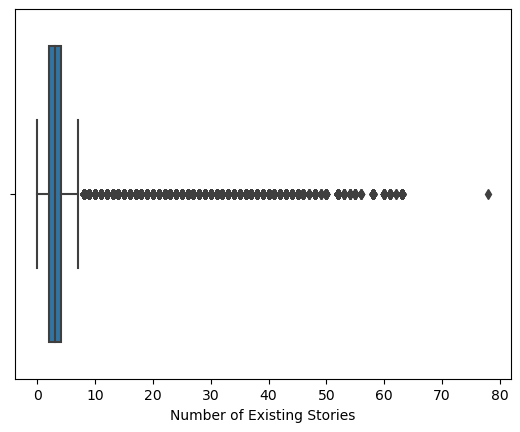

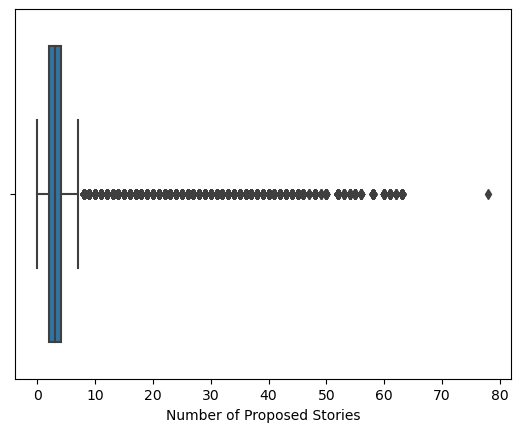

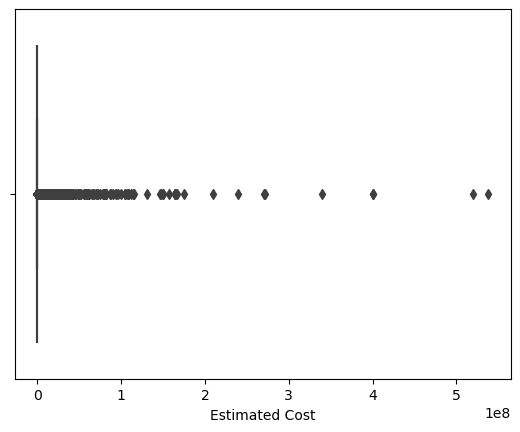

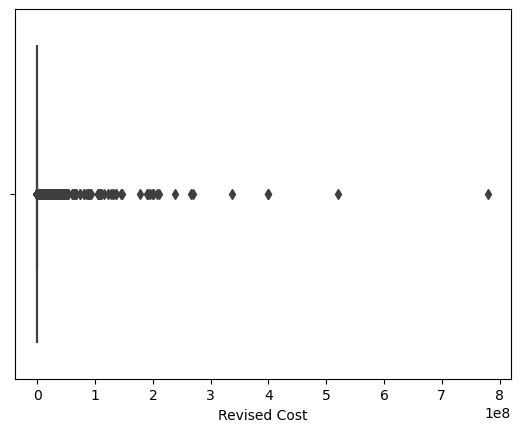

In [27]:
for col in df.columns:
    if (df[col].dtypes == 'float64'):
        plt.figure()
        sns.boxplot(df[col])

In [28]:
#remove outliers
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df.loc[df[col] < min_,col] = min_;
    df.loc[df[col] > max_,col] = max_;

In [29]:
for col in df.columns:
    if (df[col].dtypes == 'float64'):
        remove_outliers(df,col)

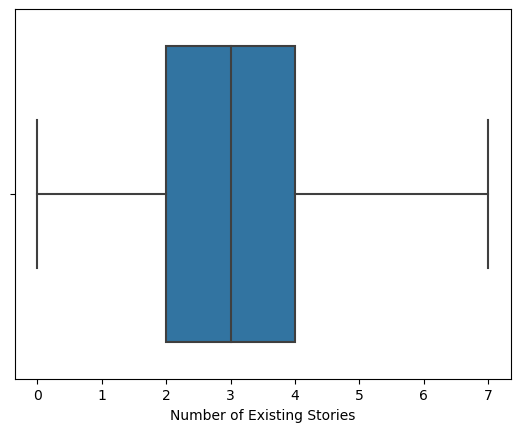

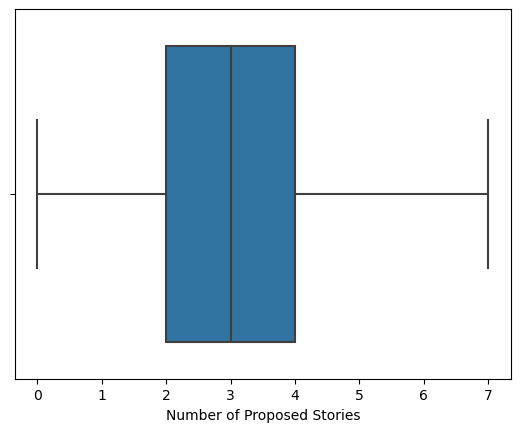

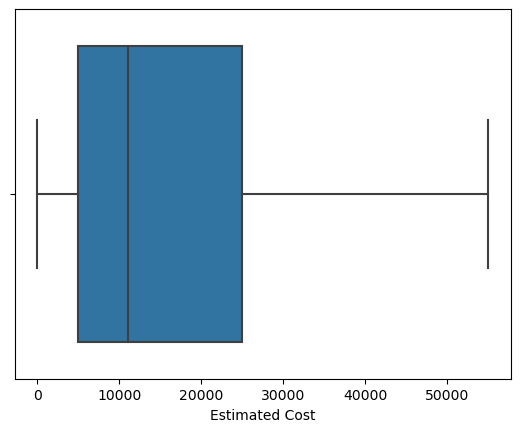

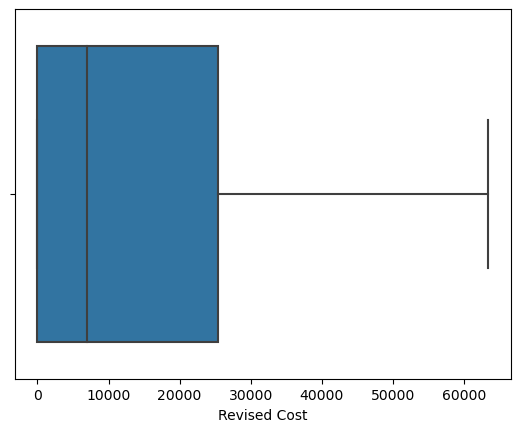

In [30]:
for col in df.columns:
    if (df[col].dtypes == 'float64'):
        plt.figure()
        sns.boxplot(df[col])

In [31]:
df.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Name,Current Status,Current Status Date,Filed Date,...,Completed Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Proposed Use,Existing Construction Type,Proposed Construction Type
0,201505065519,4,sign - erect,2015-05-06,0326,023,Ellis,expired,2017-12-21,2015-05-06,...,2017-07-24,6.0,6.0,2016-11-03,4000.0,4000.0,tourist hotel/motel,N/A,3.0,N/A
1,201604195146,4,sign - erect,2016-04-19,0306,007,Geary,issued,2017-08-03,2016-04-19,...,2017-07-24,7.0,6.0,2017-12-03,1.0,500.0,tourist hotel/motel,N/A,3.0,N/A
2,201605278609,3,additions alterations or repairs,2016-05-27,0595,203,Pacific,withdrawn,2017-09-26,2016-05-27,...,2017-07-24,6.0,6.0,2017-12-03,20000.0,7000.0,retail sales,retail sales,1.0,1.0
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,Pacific,complete,2017-07-24,2016-11-07,...,2017-07-24,2.0,2.0,2018-07-13,2000.0,2000.0,1 family dwelling,1 family dwelling,5.0,5.0
4,201611283529,6,demolitions,2016-11-28,0342,001,Market,issued,2017-12-01,2016-11-28,...,2017-07-12,3.0,5.0,2018-12-01,55000.0,63396.0,retail sales,N/A,3.0,N/A
5,201706149344,8,otc alterations permit,2017-06-14,4105,009,Indiana,issued,2017-07-06,2017-06-14,...,2017-07-12,5.0,5.0,2018-07-01,4000.0,4000.0,apartments,apartments,1.0,1.0
6,201706300814,8,otc alterations permit,2017-06-30,1739,020,11th,complete,2017-07-12,2017-06-30,...,2017-07-12,3.0,3.0,2018-06-25,12000.0,12000.0,apartments,apartments,5.0,5.0
7,M803667,8,otc alterations permit,2017-06-30,4789,014,Revere,issued,2017-06-30,2017-06-30,...,2017-10-31,3.0,2.0,2018-06-25,11000.0,0.0,N/A,N/A,N/A,N/A
8,M804227,8,otc alterations permit,2017-07-05,1212,054,Fell,issued,2017-07-05,2017-07-05,...,2017-10-31,3.0,2.0,2018-06-25,11000.0,1.0,N/A,N/A,N/A,N/A
9,M804767,8,otc alterations permit,2017-07-06,1259,016,Alpine,issued,2017-07-06,2017-07-06,...,2017-10-31,3.0,2.0,2018-06-25,11000.0,0.0,N/A,N/A,N/A,N/A


In [32]:
from sklearn.preprocessing import MinMaxScaler;

In [33]:
scaler = MinMaxScaler()
df_new = df.copy()

In [35]:
for col in df.columns:
    if (col != 'Current Status'):
        df_new[col] = scaler.fit_transform(df_new[col].values.reshape(-1,1))

ValueError: could not convert string to float: 'M803667'